# Question 8

In [33]:
import numpy as np
import scipy as sp

from matplotlib import pyplot

import statsmodels.api as sm

In [34]:
N=20000
a = sp.random.standard_normal(N)
b = np.random.uniform(-np.sqrt(3),np.sqrt(3),N)
c = np.random.choice([-1,1],N,0.5)

In [35]:
print(a.mean(),b.mean(),c.mean(),a.std()**2,b.std()**2,c.std()**2)

-0.00726435253865 -0.00476243580651 0.0122 1.00793565124 1.00519229155 0.99985116


In [36]:
Xm,Xm2,Xm3,Ya,Yb,Yc = [],[],[],[],[],[]
XYa,XYb,XYc = [],[],[]
b0,b1=1,2
for m in range(N):
    Xm.append(np.random.choice(a)), Xm2.append(np.random.choice(b)),Xm3.append(np.random.choice(c))
    Ya.append(b0+b1*Xm[m]+a[m]),Yb.append(b0+b1*Xm[m]+b[m]),Yc.append(b0+b1*Xm[m]+c[m])
    XYa.append([Xm[m],Ya[m]]),XYb.append([Xm2[m],Yb[m]]),XYc.append([Xm3[m],Yc[m]])
#print(len(Ya))

#Simulate three different bivariate models
model1 = sm.OLS(Ya,Xm).fit()
model1.summary()
model2 = sm.OLS(Yb,Xm).fit()
model3 = sm.OLS(Yc,Xm).fit()

In [42]:
 #Question (8a)
M,S=20000,100
Sa,Sb,Sc=[],[],[]
for s in range(S):
    Sa.append([XYa[i] for i in np.random.choice(len(XYa),M)])
    Sb.append([XYb[i] for i in np.random.choice(len(XYb),M)])
    Sc.append([XYc[i] for i in np.random.choice(len(XYc),M)])
print(len(Sa[99]))

20000


In [43]:
import statistics as sp
xbar,ybar,xbara,ybara=[],[],[],[]
xbar1,ybar1,xbarb,ybarb=[],[],[],[]
xbar2,ybar2,xbarc,ybarc=[],[],[],[]

for s in range(S):
    xbar.append([Sa[s][i][0] for i in range(M)])
    ybar.append([Sa[s][i][1] for i in range(M)])
    
    xbar1.append([Sb[s][i][0] for i in range(M)])
    ybar1.append([Sb[s][i][1] for i in range(M)])
    
    xbar2.append([Sc[s][i][0] for i in range(M)])
    ybar2.append([Sc[s][i][1] for i in range(M)])


    xbara.append(sp.mean(xbar[s]))
    ybara.append(sp.mean(ybar[s]))
    
    xbarb.append(sp.mean(xbar1[s]))
    ybarb.append(sp.mean(ybar1[s]))
    
    xbarc.append(sp.mean(xbar2[s]))
    ybarc.append(sp.mean(ybar2[s]))
    
print(len(xbara),len(xbarb),len(xbarc))

100 100 100


In [44]:
beta1a,beta1b,beta1c=[],[],[]
for s in range(S):
    numa=np.sum([(Sa[s][i][0]-xbara[s])*(Sa[s][i][1]-ybara[s]) for i in range(M)])
    denoma=np.sum([(Sa[s][i][0]-xbara[s])**2 for i in range(M)])
    beta1a.append(numa/denoma)
    
    numb=np.sum([(Sb[s][i][0]-xbarb[s])*(Sb[s][i][1]-ybarb[s]) for i in range(M)])
    denomb=np.sum([(Sb[s][i][0]-xbarb[s])**2 for i in range(M)])
    beta1b.append(numb/denomb)
    
    numc=np.sum([(Sc[s][i][0]-xbarc[s])*(Sc[s][i][1]-ybarc[s]) for i in range(M)])
    denomc=np.sum([(Sc[s][i][0]-xbarc[s])**2 for i in range(M)])
    beta1c.append(numc/denomc)
print(len(beta1a),len(beta1b),len(beta1c))

100 100 100


In [45]:
beta= np.array([beta1a,beta1b,beta1c])
tda,tdb,tdc=[],[],[]

for s in range(S):
    num = np.sqrt(M)*(beta[0][s]-b1)
    v = np.sum([(Sa[s][i][1]-ybara[s]-beta[0][s]*(Sa[s][i][0]-xbara[s]))**2 for i in range(M)])
    w = np.sum([(Sa[s][i][0]-xbara[s])**2 for i in range(M)])
    denum=np.sqrt(v/w)
    tda.append(num/denum)
    
    tnumb = np.sqrt(M)*(beta[1][s]-b1)
    vb = np.sum([(Sb[s][i][1]-ybarb[s]-beta[1][s]*(Sb[s][i][0]-xbarb[s]))**2 for i in range(M)])
    wb = np.sum([(Sb[s][i][0]-xbarb[s])**2 for i in range(M)])
    tdenumb=np.sqrt(vb/wb)
    tdb.append(tnumb/tdenumb)

    tnumc = np.sqrt(M)*(beta[2][s]-b1)
    vc = np.sum([(Sc[s][i][1]-ybarc[s]-beta[2][s]*(Sc[s][i][0]-xbarc[s]))**2 for i in range(M)])
    wc = np.sum([(Sc[s][i][0]-xbarc[s])**2 for i in range(M)])
    tdenumc=np.sqrt(vc/wc)
    tdc.append(tnumc/tdenumc)
    
print(len(tda),len(tdb),len(tdc)) 

100 100 100


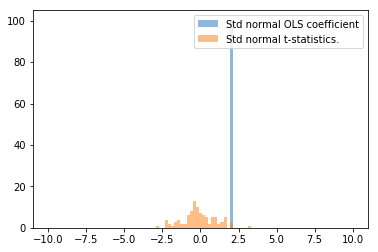

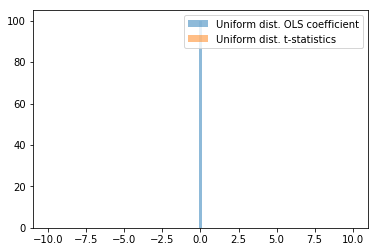

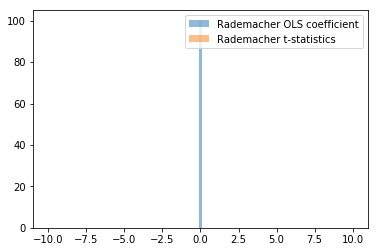

In [46]:
#Histogram plot
bins = np.linspace(-10, 10, 100)

pyplot.hist(beta1a, bins, alpha=0.5, label='Std normal OLS coefficient')
pyplot.hist(tda,bins, alpha=0.5, label='Std normal t-statistics.')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(beta1b, bins, alpha=0.5, label='Uniform dist. OLS coefficient')
pyplot.hist(tdb,bins, alpha=0.5, label='Uniform dist. t-statistics')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(beta1c, bins, alpha=0.5, label='Rademacher OLS coefficient')
pyplot.hist(tdc,bins, alpha=0.5, label='Rademacher t-statistics')
pyplot.legend(loc='upper right')
pyplot.show()